# Import packages / dependencies

In [23]:
# Import python packages
import xgboost as xgb

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, \
  f1_score, recall_score

from sklearn.preprocessing import LabelEncoder

# Load a dataset

In [25]:
df = pd.read_csv('iris.data.csv')
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Understanding the data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [27]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
df.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [30]:
df.nunique()

sepal length    35
sepal width     23
petal length    43
petal width     22
class            3
dtype: int64

In [31]:
unique_classes = df['class'].unique()
unique_classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Visualization

<Axes: xlabel='petal length', ylabel='petal width'>

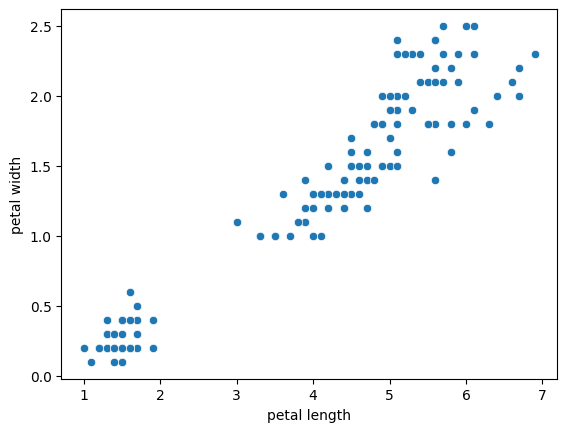

In [32]:
sns.scatterplot(data=df, x="petal length", y="petal width")

Text(0.5, 1.0, 'Total data per class')

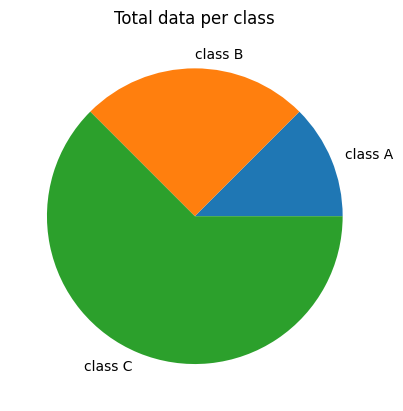

In [33]:
plt.pie([10, 20, 50], labels=["class A", "class B", "class C"])
plt.title("Total data per class")

Text(0.5, 1.0, 'Total data per class')

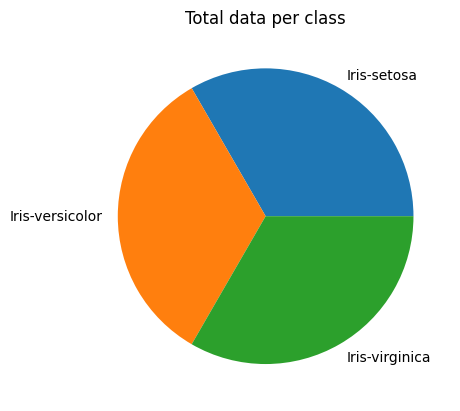

In [34]:
total_data_per_class = [len(df[df['class'] == each_class]) for each_class in unique_classes]
total_data_per_class

plt.pie(total_data_per_class, labels=unique_classes)
plt.title("Total data per class")

# Plot Confusion Matrix

In [35]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Train Test Split

In [42]:
x = df.drop(['class'], axis=1)
y = df['class']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    x,
    y_encoded,
    test_size=0.2,
    random_state=42
)

print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# Implementing algorithm (modeling)

In [73]:
def model_execution(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)
  # plot_confusion_matrix(y_test, y_pred, title='Confusion Matrix - Test Set')

  return {
      'accuracy': accuracy_score(y_test, y_pred),
      'precision': precision_score(y_test, y_pred, average=None, zero_division=1),
      'f1_score': f1_score(y_test, y_pred, average='weighted'),
      'recall_score': recall_score(y_test, y_pred, average=None)
  }

In [74]:
model_names = [
    'Random Forest',
    'Naive Bayes',
    'Decision Tree',
    'Support Vector Classifier',
    'XGB',
    'Gradient Boosting',
    'MLP Classifier',
    'LR',
    'KNN'
]
models = [
    RandomForestClassifier(),
    GaussianNB(),
    DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42),
    SVC(),
    xgb.XGBClassifier(objective="multi:softprob", random_state=42),
    GradientBoostingClassifier(learning_rate=10),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
    LogisticRegression(),
    KNeighborsClassifier()
]

for idx, model in enumerate(models):
  performance = model_execution(model, X_train, y_train, X_test, y_test)
  print(model_names[idx])
  print(performance)
  print("\n")

Random Forest
{'accuracy': 1.0, 'precision': array([1., 1., 1.]), 'f1_score': 1.0, 'recall_score': array([1., 1., 1.])}


Naive Bayes
{'accuracy': 1.0, 'precision': array([1., 1., 1.]), 'f1_score': 1.0, 'recall_score': array([1., 1., 1.])}


Decision Tree
{'accuracy': 0.9666666666666667, 'precision': array([1.        , 1.        , 0.91666667]), 'f1_score': 0.9664109121909632, 'recall_score': array([1.        , 0.88888889, 1.        ])}


Support Vector Classifier
{'accuracy': 1.0, 'precision': array([1., 1., 1.]), 'f1_score': 1.0, 'recall_score': array([1., 1., 1.])}


XGB
{'accuracy': 1.0, 'precision': array([1., 1., 1.]), 'f1_score': 1.0, 'recall_score': array([1., 1., 1.])}


Gradient Boosting
{'accuracy': 1.0, 'precision': array([1., 1., 1.]), 'f1_score': 1.0, 'recall_score': array([1., 1., 1.])}


MLP Classifier
{'accuracy': 0.3, 'precision': array([1. , 0.3, 1. ]), 'f1_score': 0.13846153846153844, 'recall_score': array([0., 1., 0.])}


LR
{'accuracy': 1.0, 'precision': array([1.,